# Домашняя работа

Исследуем рынок труда в России в 2019 году по данным опросника РМЭЗ НИУ ВШЭ (подробнее о нем [тут](https://www.hse.ru/rlms/)).

Импортируем библиотеки и настраиваем параметры графиков

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='darkgrid', palette='pastel', color_codes=True)
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
## возможно, нужно запустить код ниже
# ! pip install seaborn

Создаем словарь для указания типов данных в колонках и словарь для переименования колонок. 

In [98]:
## создаем словарь

cols = {
    'region':'category',
    'status':'category',
    ##'popul':'category',
    ##'ui3':'category',
    ##'ui4':'category',
    'u_age':int,
    'uh5':'category',
    'u_marst':'category',
    'u_diplom':'category',
    #'u_educ':'category',
    'u_occup08':'category',
    'uj1':'category',
    'uj4.1':'category',
    'uj13.2':float
}
rename_cols={
    'region':'region',
    'status':'town_type',
    ##'popul':'population',
    ##'ui3':'origin_type',
    ##'ui4':'nationality',
    'u_age':'age',
    'uh5':'sex',
    'u_marst':'marital_status',
    'u_diplom':'finished_education',
    #'u_educ':'education',
    'u_occup08':'professional_group',
    'uj1':'employed',
    'uj4.1':'industry',
    'uj13.2':'wage'}

cols_ = ['x'+x[1:] if x[0]=='u' else x for x in cols.keys()]
rename_cols = {('x'+key[1:] if key[0]=='u' else key):value   for key,value in rename_cols.items()}

Загружаем данные

In [99]:
##df = pd.read_spss('r28i_os_32.sav', usecols=rename_cols.keys()) ## original data

df = pd.read_csv('/content/sample_data/rlms19.csv', usecols=rename_cols.keys())
df.head()

,status,x_marst,x_occup08,x_diplom,x_age,region,xh5,xj1,xj4.1,xj13.2
0,ПГТ,Bдовец (вдова),работники сферы торговли и услуг,законченное среднее образование,64.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Вы сейчас работаете,ЗДРАВООХРАНЕНИЕ,25000.0
1,ПГТ,Никогда в браке не состояли,NaN,незаконченное среднее образование (7 - 8 кл) +...,75.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
2,ПГТ,Состоите в зарегистрированном браке,NaN,законченное среднее специальное образование,73.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
3,ПГТ,Состоите в зарегистрированном браке,NaN,незаконченное среднее образование (7 - 8 кл),65.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
4,ПГТ,Состоите в зарегистрированном браке,"квалифицированные рабочие, использующие машины...",законченное среднее образование,51.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Вы сейчас работаете,"ТРАНСПОРТ, СВЯЗЬ",18000.0


In [100]:
df.shape

(12228, 10)

## Подготовка данных

<font color='red'>**[task 1, 0.5б.]**</font><br/>
Переименуйте колонки в соответствии со словарем `rename_cols`.

In [101]:
df = df.rename(columns=rename_cols)
df

,town_type,marital_status,professional_group,finished_education,age,region,sex,employed,industry,wage
0,ПГТ,Bдовец (вдова),работники сферы торговли и услуг,законченное среднее образование,64.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Вы сейчас работаете,ЗДРАВООХРАНЕНИЕ,25000.0
1,ПГТ,Никогда в браке не состояли,NaN,незаконченное среднее образование (7 - 8 кл) +...,75.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
2,ПГТ,Состоите в зарегистрированном браке,NaN,законченное среднее специальное образование,73.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
3,ПГТ,Состоите в зарегистрированном браке,NaN,незаконченное среднее образование (7 - 8 кл),65.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
4,ПГТ,Состоите в зарегистрированном браке,"квалифицированные рабочие, использующие машины...",законченное среднее образование,51.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Вы сейчас работаете,"ТРАНСПОРТ, СВЯЗЬ",18000.0
...,...,...,...,...,...,...,...,...,...,...
12223,ПГТ,Bдовец (вдова),NaN,законченное среднее образование,48.0,Московская область,МУЖСКОЙ,Или у Вас сейчас нет работы,NaN,NaN
12224,Город,Состоите в зарегистрированном браке,служащие офисные и по обслуживанию клиентов,незаконченное среднее образование (7 - 8 кл) +...,70.0,Московская область,ЖЕНСКИЙ,Вы сейчас работаете,"ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ",18000.0
12225,Город,Состоите в зарегистрированном браке,NaN,незаконченное среднее образование (7 - 8 кл) +...,70.0,Московская область,МУЖСКОЙ,Или у Вас сейчас нет работы,NaN,NaN
12226,Город,Разведены и в браке не состоите,NaN,законченное среднее специальное образование,68.0,Московская область,ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN


<font color='red'>**[task 2, 0.5б.]**</font><br/>
Замените пропуски закодированные как `'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА'` на `np.nan`, используя метод `replace`.

In [102]:
nans = ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА']
df = df.replace(to_replace=nans, value=np.nan)
df

,town_type,marital_status,professional_group,finished_education,age,region,sex,employed,industry,wage
0,ПГТ,Bдовец (вдова),работники сферы торговли и услуг,законченное среднее образование,64.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Вы сейчас работаете,ЗДРАВООХРАНЕНИЕ,25000.0
1,ПГТ,Никогда в браке не состояли,NaN,незаконченное среднее образование (7 - 8 кл) +...,75.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
2,ПГТ,Состоите в зарегистрированном браке,NaN,законченное среднее специальное образование,73.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
3,ПГТ,Состоите в зарегистрированном браке,NaN,незаконченное среднее образование (7 - 8 кл),65.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN
4,ПГТ,Состоите в зарегистрированном браке,"квалифицированные рабочие, использующие машины...",законченное среднее образование,51.0,"Ленинградская область, Волосовский район",ЖЕНСКИЙ,Вы сейчас работаете,"ТРАНСПОРТ, СВЯЗЬ",18000.0
...,...,...,...,...,...,...,...,...,...,...
12223,ПГТ,Bдовец (вдова),NaN,законченное среднее образование,48.0,Московская область,МУЖСКОЙ,Или у Вас сейчас нет работы,NaN,NaN
12224,Город,Состоите в зарегистрированном браке,служащие офисные и по обслуживанию клиентов,незаконченное среднее образование (7 - 8 кл) +...,70.0,Московская область,ЖЕНСКИЙ,Вы сейчас работаете,"ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ",18000.0
12225,Город,Состоите в зарегистрированном браке,NaN,незаконченное среднее образование (7 - 8 кл) +...,70.0,Московская область,МУЖСКОЙ,Или у Вас сейчас нет работы,NaN,NaN
12226,Город,Разведены и в браке не состоите,NaN,законченное среднее специальное образование,68.0,Московская область,ЖЕНСКИЙ,Или у Вас сейчас нет работы,NaN,NaN


<font color='red'>**[task 3, 0.5б.]**</font><br/>
Используя метод `replace`, замените категории `ЖЕНСКИЙ` на `Ж`, а `МУЖСКОЙ` на `М` в колонке `sex`.

In [103]:
dict_ = {'ЖЕНСКИЙ':'Ж', 'МУЖСКОЙ':'М'}
df = df.replace(dict_)
df

,town_type,marital_status,professional_group,finished_education,age,region,sex,employed,industry,wage
0,ПГТ,Bдовец (вдова),работники сферы торговли и услуг,законченное среднее образование,64.0,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,ЗДРАВООХРАНЕНИЕ,25000.0
1,ПГТ,Никогда в браке не состояли,NaN,незаконченное среднее образование (7 - 8 кл) +...,75.0,"Ленинградская область, Волосовский район",Ж,Или у Вас сейчас нет работы,NaN,NaN
2,ПГТ,Состоите в зарегистрированном браке,NaN,законченное среднее специальное образование,73.0,"Ленинградская область, Волосовский район",Ж,Или у Вас сейчас нет работы,NaN,NaN
3,ПГТ,Состоите в зарегистрированном браке,NaN,незаконченное среднее образование (7 - 8 кл),65.0,"Ленинградская область, Волосовский район",Ж,Или у Вас сейчас нет работы,NaN,NaN
4,ПГТ,Состоите в зарегистрированном браке,"квалифицированные рабочие, использующие машины...",законченное среднее образование,51.0,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,"ТРАНСПОРТ, СВЯЗЬ",18000.0
...,...,...,...,...,...,...,...,...,...,...
12223,ПГТ,Bдовец (вдова),NaN,законченное среднее образование,48.0,Московская область,М,Или у Вас сейчас нет работы,NaN,NaN
12224,Город,Состоите в зарегистрированном браке,служащие офисные и по обслуживанию клиентов,незаконченное среднее образование (7 - 8 кл) +...,70.0,Московская область,Ж,Вы сейчас работаете,"ЛЕГКАЯ, ПИЩЕВАЯ ПРОМЫШЛЕННОСТЬ",18000.0
12225,Город,Состоите в зарегистрированном браке,NaN,незаконченное среднее образование (7 - 8 кл) +...,70.0,Московская область,М,Или у Вас сейчас нет работы,NaN,NaN
12226,Город,Разведены и в браке не состоите,NaN,законченное среднее специальное образование,68.0,Московская область,Ж,Или у Вас сейчас нет работы,NaN,NaN


<font color='red'>**[task 4, 0.5б.]**</font><br/>
В колонках `industry` и `marital_status` приведите символы к нижнему регистру и к заглавной букве. В колонке `industry` замените `It, информационные технологии` на `IT, информационные технологии`, используя метод `replace`.

In [104]:
df['industry'] = df['industry'].str.capitalize()
df['marital_status'] = df['marital_status'].str.capitalize()
df = df.replace(to_replace='It, информационные технологии', value='IT, информационные технологии')
df

,town_type,marital_status,professional_group,finished_education,age,region,sex,employed,industry,wage
0,ПГТ,Bдовец (вдова),работники сферы торговли и услуг,законченное среднее образование,64.0,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,Здравоохранение,25000.0
1,ПГТ,Никогда в браке не состояли,NaN,незаконченное среднее образование (7 - 8 кл) +...,75.0,"Ленинградская область, Волосовский район",Ж,Или у Вас сейчас нет работы,NaN,NaN
2,ПГТ,Состоите в зарегистрированном браке,NaN,законченное среднее специальное образование,73.0,"Ленинградская область, Волосовский район",Ж,Или у Вас сейчас нет работы,NaN,NaN
3,ПГТ,Состоите в зарегистрированном браке,NaN,незаконченное среднее образование (7 - 8 кл),65.0,"Ленинградская область, Волосовский район",Ж,Или у Вас сейчас нет работы,NaN,NaN
4,ПГТ,Состоите в зарегистрированном браке,"квалифицированные рабочие, использующие машины...",законченное среднее образование,51.0,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,"Транспорт, связь",18000.0
...,...,...,...,...,...,...,...,...,...,...
12223,ПГТ,Bдовец (вдова),NaN,законченное среднее образование,48.0,Московская область,М,Или у Вас сейчас нет работы,NaN,NaN
12224,Город,Состоите в зарегистрированном браке,служащие офисные и по обслуживанию клиентов,незаконченное среднее образование (7 - 8 кл) +...,70.0,Московская область,Ж,Вы сейчас работаете,"Легкая, пищевая промышленность",18000.0
12225,Город,Состоите в зарегистрированном браке,NaN,незаконченное среднее образование (7 - 8 кл) +...,70.0,Московская область,М,Или у Вас сейчас нет работы,NaN,NaN
12226,Город,Разведены и в браке не состоите,NaN,законченное среднее специальное образование,68.0,Московская область,Ж,Или у Вас сейчас нет работы,NaN,NaN


<font color='red'>**[task 5, 0.5б.]**</font><br/>
В колонке `'age'` приведите тип данных к `int`, а в `'wage'` к `float`, используя метод astype.


In [115]:
df = df.astype({'age': 'int', 'wage': 'float'})

Получим таблицу в следующем виде.

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12228 entries, 0 to 12227
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   town_type           12228 non-null  object 
 1   marital_status      10408 non-null  object 
 2   professional_group  5085 non-null   object 
 3   finished_education  10401 non-null  object 
 4   age                 12228 non-null  int64  
 5   region              12228 non-null  object 
 6   sex                 12228 non-null  object 
 7   employed            10406 non-null  object 
 8   industry            5071 non-null   object 
 9   wage                4398 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 955.4+ KB


## Анализ данных

### Частоты категориальных колонок

<font color='red'>**[task 6, 1б.]**</font><br/>
Познакомимся с рынком труда России. Для этого допишите функцию info_count.

In [519]:
def info_count(df, col):
    ## группируем таблицу df по колонке col
    ## считаем количество значений в каждой категории колонки col
    ## делаем сортировку по количеству значений
    ## делим сгруппированную таблицу на число без пропущенных значений, чтобы посчитать долю
    
    g = df.groupby(by=[col]).size().sort_values()
    g /= df[col].count()

    ## далее строится график
    g.plot(kind='barh')
    for index, value in enumerate(g):
        plt.text(value, index, str(round(value*100,1))+'%')
    plt.grid(True)
    plt.show()



,age,wage
town_type,,
Город,0.003439,2.270264
Областной центр,0.003479,2.698237
ПГТ,0.003580,2.202740
Село,0.003435,1.832535


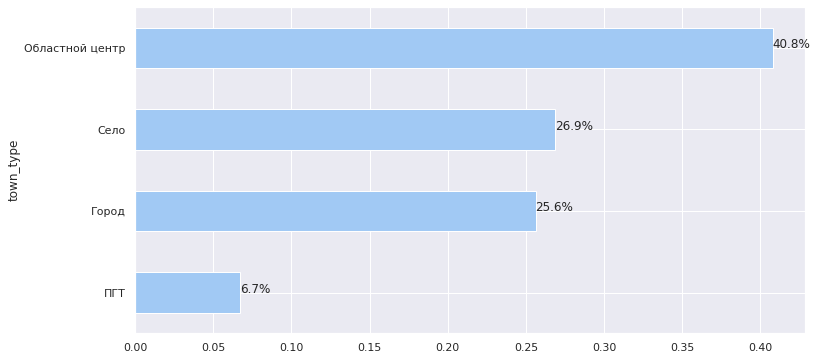

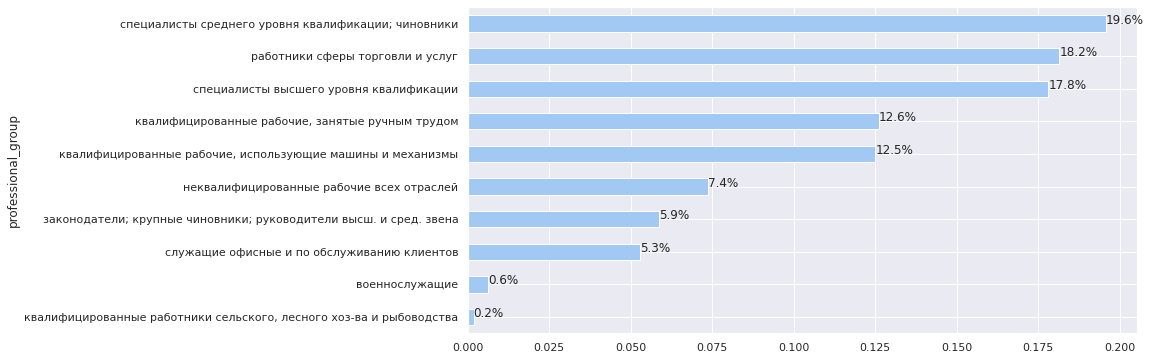

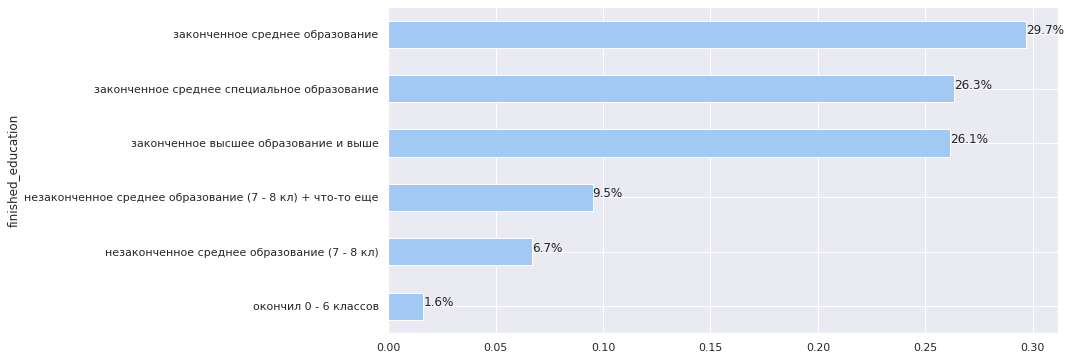

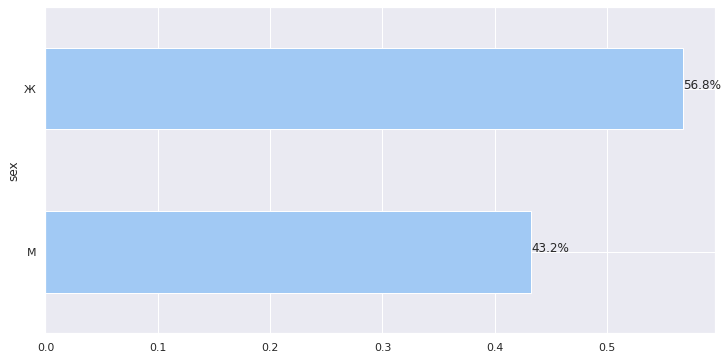

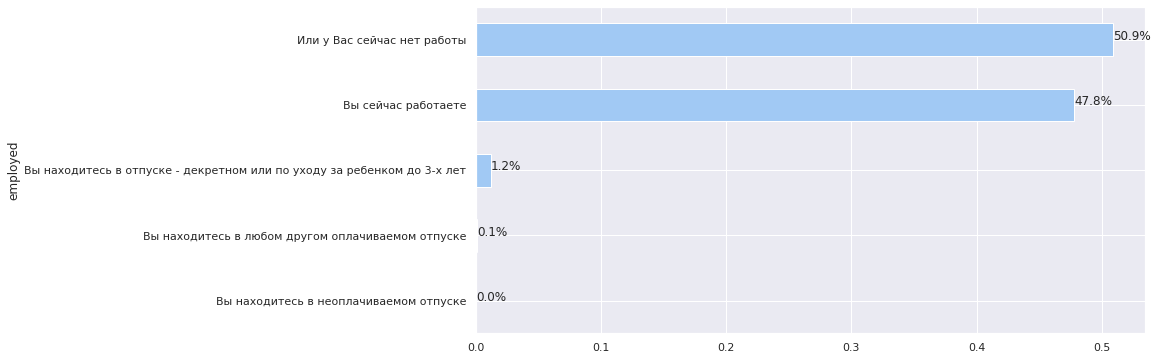

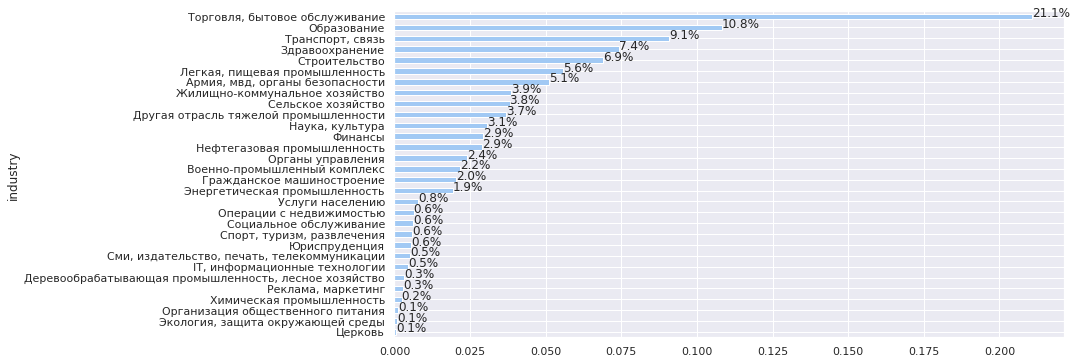

In [249]:
plot_cols = ['town_type', 
            #'marital_status', 
            'professional_group',
            'finished_education', 
            #'age', 'region', 'wage'
            'sex', 
            'employed', 'industry',
           ]
for col in plot_cols:
    info_count(df, col)

<font color='red'>**[task 7, 0.5б.]**</font><br/>
Рассмотрите графики выше и ответьте на следующие вопросы:
- В поселениях какого типа живет больше всего людей?
- Какие самые распространенные проффесиональные группы?
- Какое самое распространенное образование?
- Сколько людей имеет работу в выборке?
- Какая самая распространенная отрасль работы?
---



1) областной центр

2) специалисты среднего уровня квалификации; чиновники

3) законченное среднее образование

4) 4972 (что составляет 47,8%)

5) Торговля, бытовое обслуживание







In [285]:
df[df['employed'] == 'Вы сейчас работаете'].count()

town_type             4972
marital_status        4969
professional_group    4951
finished_education    4970
age                   4972
region                4972
sex                   4972
employed              4972
industry              4939
wage                  4291
dtype: int64

### Медианная зарплата

<font color='red'>**[task 8, 1б.]**</font><br/>
Создайте подвыборку, удалив из исходной безработных (ответ в колонке `employed` – `Или у Вас сейчас нет работы`), и тех, у кого зарплата не указана или записана как 0, запишите эту подвыборку в отдельную переменную `df_emp`.

In [284]:
df_emp = df[df['employed'] != 'Или у Вас сейчас нет работы']
df_emp = df_emp[df_emp['wage'] > 0]
df_emp

,town_type,marital_status,professional_group,finished_education,age,region,sex,employed,industry,wage
0,ПГТ,Bдовец (вдова),работники сферы торговли и услуг,законченное среднее образование,64,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,Здравоохранение,25000.0
4,ПГТ,Состоите в зарегистрированном браке,"квалифицированные рабочие, использующие машины...",законченное среднее образование,51,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,"Транспорт, связь",18000.0
10,Село,Bдовец (вдова),работники сферы торговли и услуг,законченное среднее образование,66,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,Здравоохранение,28000.0
11,Село,"Живете вместе, но не зарегистрированы",специалисты высшего уровня квалификации,законченное высшее образование и выше,43,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,Образование,70000.0
12,Село,Состоите в зарегистрированном браке,работники сферы торговли и услуг,законченное среднее образование,56,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,Жилищно-коммунальное хозяйство,20000.0
...,...,...,...,...,...,...,...,...,...,...
12211,Село,Состоите в зарегистрированном браке,работники сферы торговли и услуг,законченное высшее образование и выше,48,Московская область,М,Вы сейчас работаете,Услуги населению,40000.0
12212,Село,Состоите в зарегистрированном браке,специалисты высшего уровня квалификации,законченное высшее образование и выше,45,Московская область,Ж,Вы сейчас работаете,Образование,33000.0
12215,ПГТ,"Живете вместе, но не зарегистрированы",законодатели; крупные чиновники; руководители ...,законченное высшее образование и выше,35,Московская область,Ж,Вы сейчас работаете,Образование,25000.0
12216,ПГТ,Bдовец (вдова),неквалифицированные рабочие всех отраслей,законченное среднее образование,60,Московская область,Ж,Вы сейчас работаете,Образование,12000.0


<font color='red'>**[task 9, 0.5б.]**</font><br/>
Допишите функцию ниже для подсчета [медианной](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%B0_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0)) [зарплаты](https://www.kommersant.ru/doc/4441454#:~:text=%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%BD%D0%B0%D1%8F%20%D0%B7%D0%B0%D1%80%D0%BF%D0%BB%D0%B0%D1%82%D0%B0%20%E2%80%94%20%D1%8D%D1%82%D0%BE%20%D1%82%D0%B0%D0%BA%D0%BE%D0%B9%20%D1%83%D1%80%D0%BE%D0%B2%D0%B5%D0%BD%D1%8C,%D1%81%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85%20%D0%B7%D0%B0%D1%80%D0%BF%D0%BB%D0%B0%D1%82%20%D0%B2%20%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5.) и построения графика.

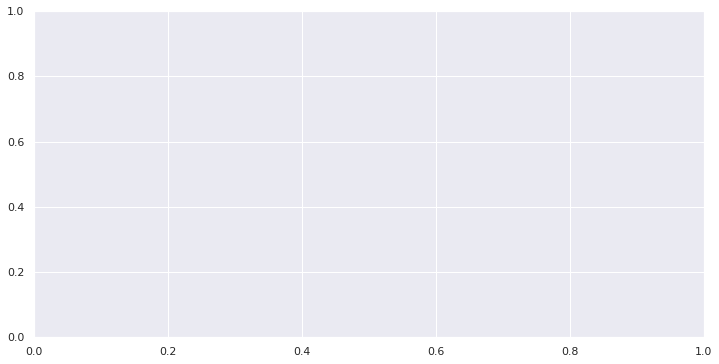

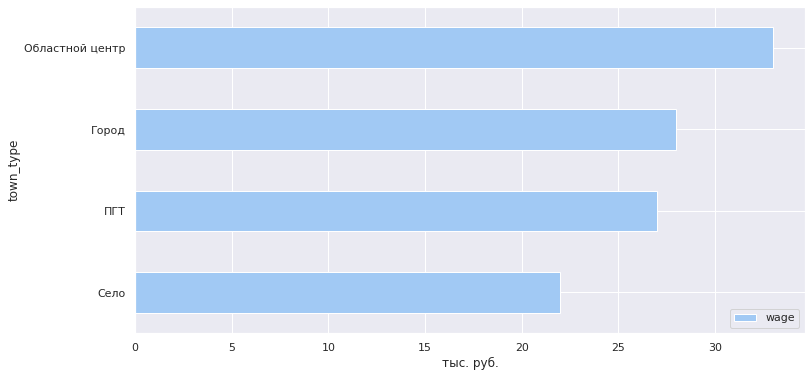

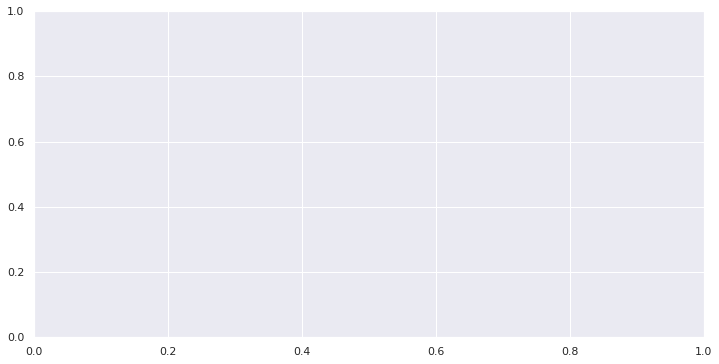

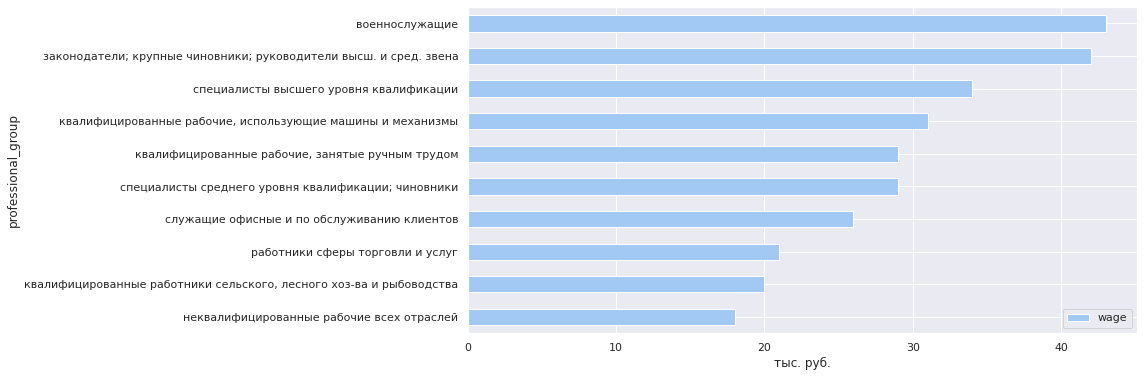

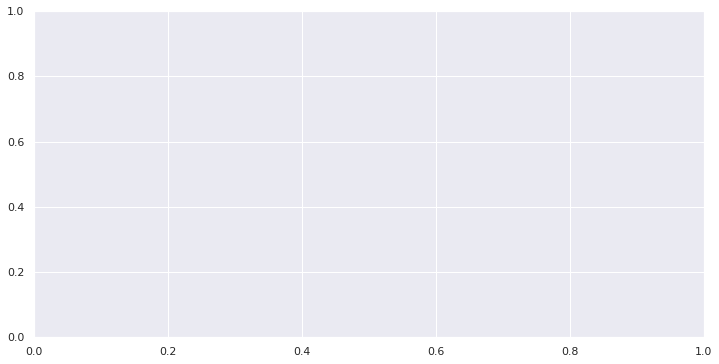

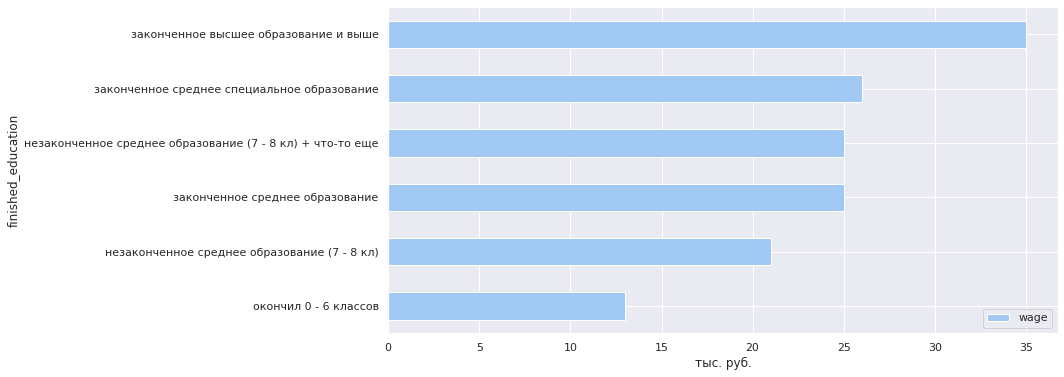

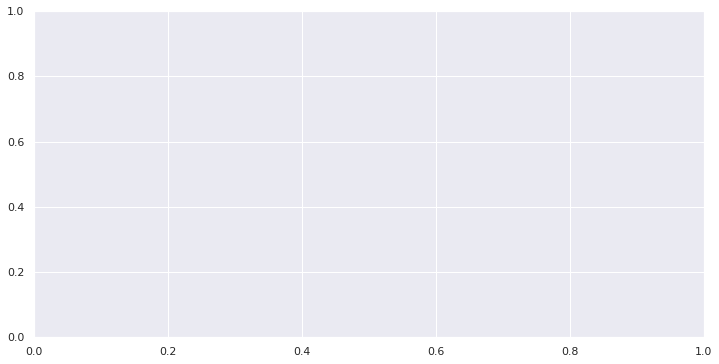

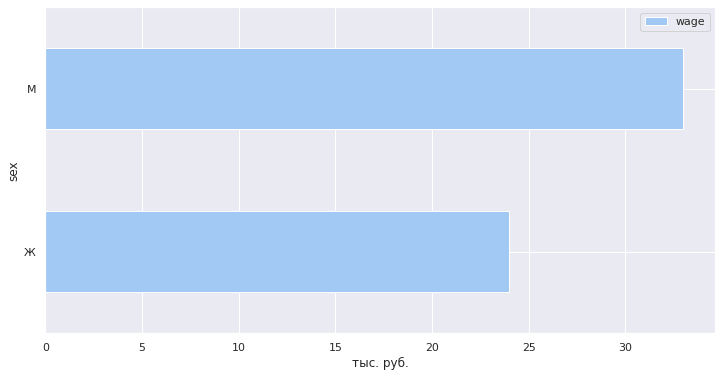

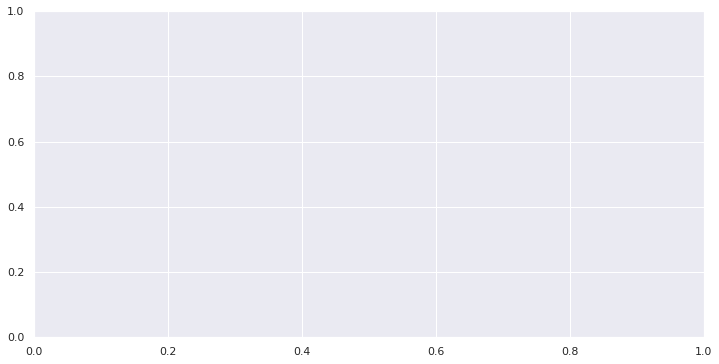

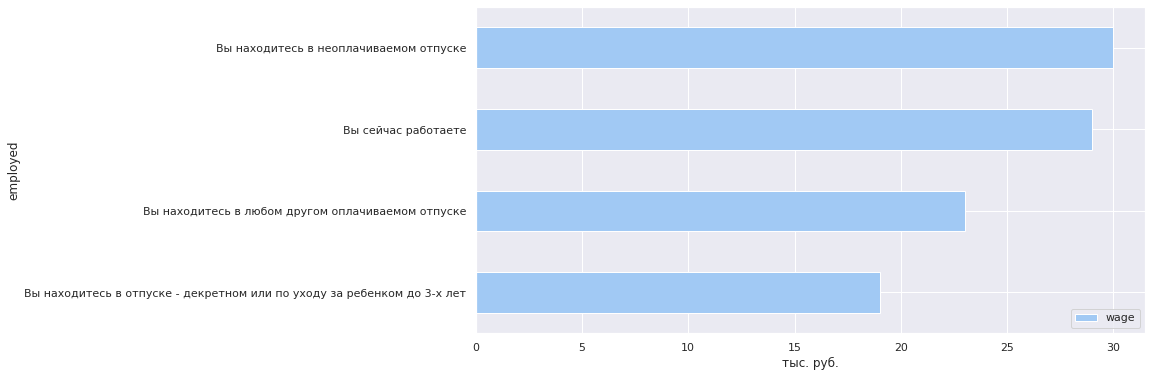

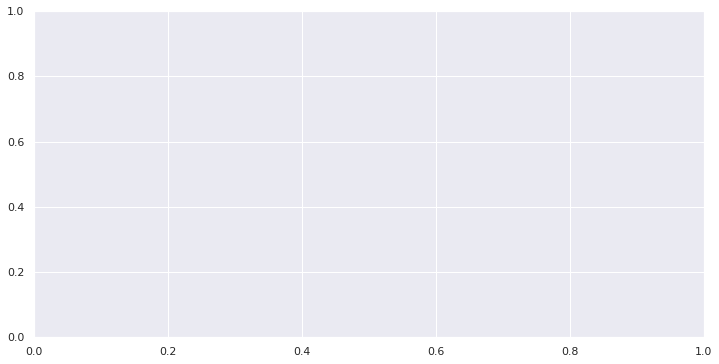

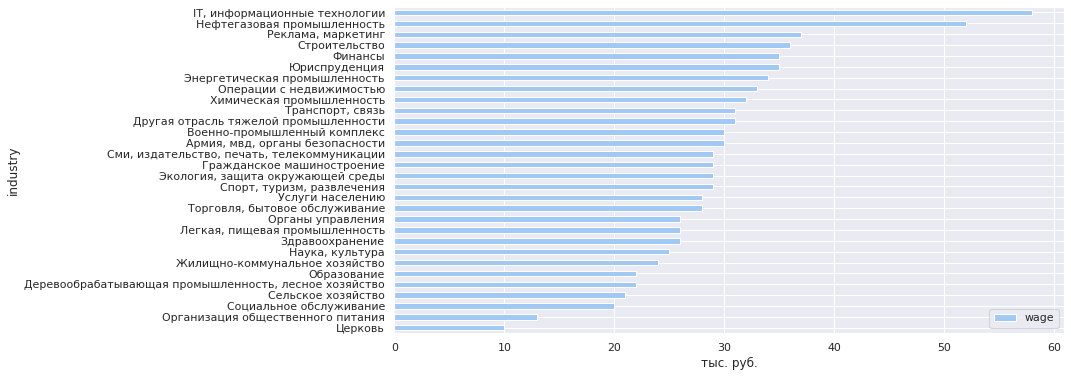

In [546]:
def info_wage_median(df, col):
    # рассмотрим медианную зарплату в зависимости от категории для некоторых категориальных колонок
    ## группируем таблицу по колонке col
    ## считаем медианное значение в колонке 'wage'
    ## делаем сортировку по значениям
    ## делим все значения на тысячу, чтобы смотреть на зарплату в тысячах
    ## результат записываем в переменную g
    
    g = df_emp.groupby(by=[col]).mean()[['wage']]
    g = g.sort_values(by='wage')
    g //= 1000  
    
    ## далее строится график
    fig, ax = plt.subplots(figsize = (12,6))
    g.plot(kind='barh')
    #for index, value  in enumerate(g):
      #plt.text(value, index, str(int(value)))
    plt.grid(True)
    plt.xlabel('тыс. руб.')
    plt.show()


for col in plot_cols:
    info_wage_median(df_emp, col)



<font color='red'>**[task 10, 0.5б.]**</font><br/>
Ответьте на следующие вопросы:
- В поселениях какого типа выше медианная зарплата? **(Областной центр)**
- Работающие в какой проффесиональной группе, с каким образованием и в какой отрасли получают бОльшую медианную зарплату? **(военнослужащие, законченное высшее образование и выше, IT)**
---



### Распределение зарплат

<font color='red'>**[task 11, 1.5б.]**</font><br/>

Добавить в переменную `df_emp` новый столбец `wage_bin`, где в соответствии с зарплатой будет указан диапазон зарплаты в тыс. рублей. Возможные значения диапазон начинаются от 0 и идут с шагом 4. Например, для зарплаты 2000 рублей должен быть указан диапазон (0,4], а для 5000 рублей – (4,10], и т.д.

In [537]:
df_emp['wage_bin'] = np.nan
for index, row in df_emp.iterrows():
  for i in range(0, 100, 4):
    if i <= df_emp['wage'][index] // 1000 < i + 4:
      df_emp['wage_bin'][index] = '(' + str(i) + ',' + str(i + 4) + ']'
df_emp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,town_type,marital_status,professional_group,finished_education,age,region,sex,employed,industry,wage,wage_bin
0,ПГТ,Bдовец (вдова),работники сферы торговли и услуг,законченное среднее образование,64,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,Здравоохранение,25000.0,"(24,28]"
4,ПГТ,Состоите в зарегистрированном браке,"квалифицированные рабочие, использующие машины...",законченное среднее образование,51,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,"Транспорт, связь",18000.0,"(16,20]"
10,Село,Bдовец (вдова),работники сферы торговли и услуг,законченное среднее образование,66,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,Здравоохранение,28000.0,"(28,32]"
11,Село,"Живете вместе, но не зарегистрированы",специалисты высшего уровня квалификации,законченное высшее образование и выше,43,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,Образование,70000.0,"(68,72]"
12,Село,Состоите в зарегистрированном браке,работники сферы торговли и услуг,законченное среднее образование,56,"Ленинградская область, Волосовский район",Ж,Вы сейчас работаете,Жилищно-коммунальное хозяйство,20000.0,"(20,24]"
...,...,...,...,...,...,...,...,...,...,...,...
12211,Село,Состоите в зарегистрированном браке,работники сферы торговли и услуг,законченное высшее образование и выше,48,Московская область,М,Вы сейчас работаете,Услуги населению,40000.0,"(40,44]"
12212,Село,Состоите в зарегистрированном браке,специалисты высшего уровня квалификации,законченное высшее образование и выше,45,Московская область,Ж,Вы сейчас работаете,Образование,33000.0,"(32,36]"
12215,ПГТ,"Живете вместе, но не зарегистрированы",законодатели; крупные чиновники; руководители ...,законченное высшее образование и выше,35,Московская область,Ж,Вы сейчас работаете,Образование,25000.0,"(24,28]"
12216,ПГТ,Bдовец (вдова),неквалифицированные рабочие всех отраслей,законченное среднее образование,60,Московская область,Ж,Вы сейчас работаете,Образование,12000.0,"(12,16]"


<font color='red'>**[task 12, 1б.]**</font><br/>
Посчитайте долю каждого диапазона зарплат в выборке.

In [544]:
g = df_emp.groupby(['wage_bin']).size()
g /= df_emp['wage_bin'].count()
g

wage_bin
(0,4]      0.003270
(12,16]    0.136183
(16,20]    0.100677
(20,24]    0.138753
(24,28]    0.114226
(28,32]    0.123102
(32,36]    0.071712
(36,40]    0.016585
(4,8]      0.016585
(40,44]    0.067040
(44,48]    0.026629
(48,52]    0.038075
(52,56]    0.012847
(56,60]    0.002803
(60,64]    0.020790
(64,68]    0.005373
(68,72]    0.014249
(72,76]    0.003504
(76,80]    0.000467
(8,12]     0.074048
(80,84]    0.009110
(84,88]    0.001869
(88,92]    0.001168
(92,96]    0.000934
dtype: float64

<font color='red'>**[task 13, 0.5б.]**</font><br/>
Рассмотрите [гистограмму распределения](https://en.wikipedia.org/wiki/Histogram) зарплат. Какой диапазон зарплаты наиболее часто встречаемый? 

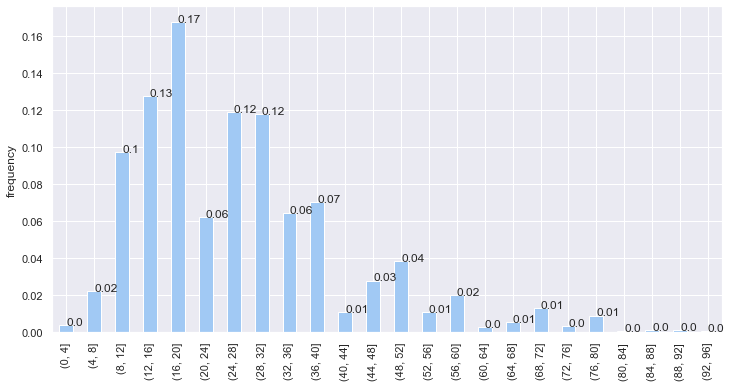

In [ ]:
g.plot(kind='bar')
for index, value in enumerate(g):
    plt.text(index, value, str(round(value,2)))
plt.ylabel('frequency')
plt.show()

**От 12 до 16 тыс**

### Gender wage gap

<font color='red'>**[task 14, 0.5б.]**</font><br/>
Создайте две подвыборки: одну с мужчинами, чья зарплата меньше или равна 100 тыс. руб, и одну с женщинами, чья зарплата также ниже 100 тыс. руб. 

In [414]:
m_under100k = df[(df['sex'] == 'М') & (df['wage'] <= 100000)]
f_under100k = df[(df['sex'] == 'Ж') & (df['wage'] <= 100000)]

<font color='red'>**[task 15, 0.5б]**</font><br/>
Рассмотрите график. Можно ли говорить о значительной разнице в зарплатах между женщинами и мужчинами? 

[Подробнее о феномене](https://en.wikipedia.org/wiki/Gender_pay_gap).

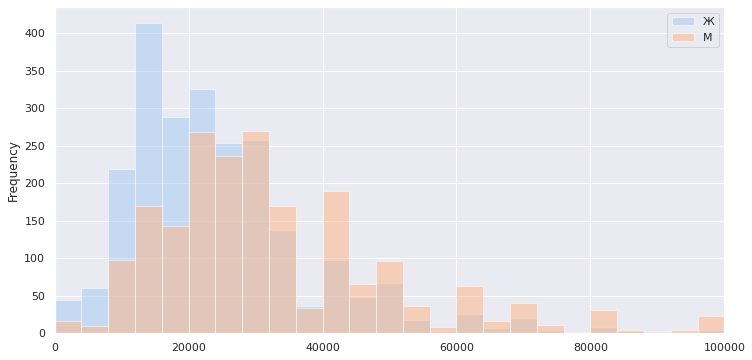

In [545]:
bins=25
maxx=100000

f_under100k['wage'].plot(kind='hist', bins=bins, alpha=0.5, label='Ж')
m_under100k['wage'].plot(kind='hist', bins=bins, alpha=0.5, label='М')
plt.xlim(0,maxx)

plt.legend()
plt.show()

Можно сказать о том, что в основном мужчины зарабатывают больше, чем женщины. 

## Разбалловка по заданиям

| Задание | Вес |
|---------|-----|
|       1 | 0.5 |
|       2 | 0.5 |
|       3 | 0.5 |
|       4 | 0.5 |
|       5 | 0.5 |
|       6 |   1 |
|       7 | 0.5 |
|       8 |   1 |
|       9 | 0.5 |
|      10 | 0.5 |
|      11 | 1.5 |
|      12 |   1 |
|      13 | 0.5 |
|      14 | 0.5 |
|      15 | 0.5 |
| sum     |  10 |